# K-Means Clustering Brief

## Description
Découvrir l'apprentissage non-supervisé au travers de l'algorithme K-means.

## Contexte
L'apprentissage supervisé ce présente comme une approche de l'apprentissage automatique qui permet de découvrir la structure sous-jacente des données en l'absence d'étiquetage, c'est à dire sans catégories ou classe connue en avance.

Afin de se familiariser avec cette approche et mieux l'appréhender pour l'utiliser dans des scénario plus complexe, les objectifs sont les suivants :

Nous souhaitons comprendre le principe de cette technique et les scénarios d'utilisation
Expérimenter et évaluer un algorithme de cet classe de problème d'apprentissage : les K-moyennes (ou K-means) sur un jeu de données simple.
Comprendre et comparer les métrique d'évaluation en jeux
tester sur des jeux précédemment utilisé de classification, la capacité de l'algorithme à retrouver les catégories de prédiction.

## Question de veilles:

**1. Qu'est ce que le clustering ? Est ce un probleme difficile ? pourquoi ?**

**2. Qu'elle est la compléxité d'un probléme de clustering ? Quelle sont les métrique utilisé pour le clustering ?**

**3. Ecriver en une phrase votre comprhéension pour chaque métrique découverte**

**4. Séparer les métrique avec "ground truth" et "sans "ground truth".**

**5. Différences entre NMI et AMI ?**

## Ressources
https://le-datascientist.fr/apprentissage-supervise-vs-non-supervise  <br>
https://realpython.com/k-means-clustering-python/#writing-your-first-k-means-clustering-code-in-python <br>
(fr) https://mrmint.fr/algorithme-k-means <br>
https://scikit-learn.org/stable/modules/clustering.html#clustering <br>
https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation <br>

## Livrable
Un git par apprenant avec les éléments suivants:

Un notebook, résumant le travail

## Modalité pédagogique
durée: 2 jours groupe: individuel

### 1.1 Qu'est ce que le clustering ? 
Le clustering est une méthode d'apprentissage automatique qui consiste à regrouper des points donnés par similarité ou par distance. C'est une méthode d'apprentissage non supervisé et une technique populaire d'analyse statistique des données.

Pour un ensemble donné de points, vous pouvez utiliser des algorithme de classification pour classer ces points individuels dans des groupes spécifiques. 

En conséquence, les points de données d'un groupe particulier présente des propriétés similaires. Dans un même temps, les points de données de différents groupe ont des caractéristiques différentes. 

Le but des algorithmes de clustering ont plusieurs utilisation dans différents secteurs. Par exemple, vous avez besoin d'algorithme de classification pour classer les maladies en sciences médicale. Parallèlement, le clustering vous aide à classer vos clients dans le domaine des études de marché.

Voici, quelques exemples populaire d'algorithme d'apprentissage automatique non supervisé :
. K-Means clustering (le plus populaire) <br>
. Dimensionality reduction <br>
. Neural network/ Deep learning <br>
. Principal component analysis <br>
. singular Value Decomposition <br>
. Independant Component Analysis <br>
. Distribution Models <br>
. Hierarchical Clustering <br>

### 1.2 Est ce un probleme difficile ? pourquoi ?

La difficulté du clustering va résider dans le choix du nombre de cluster qui doit être déterminé par l'utilisateur, l'algorithme n'étant pas suffisamment autonome pour le faire lui même. Cependant, une méthode tès efficace existe, permettant ainsi de déterminer le nombre de cluster idéal, "la méthode Elbow". 
Autre difficultés, la détermination des centroides (méthode k means ++)

K-means algorithm allow you to classify your data for discovering groups 

### 2.1 Qu'elle est la compléxité d'un probléme de clustering ? 
Complexité en temps et en mémoire Big O


### 2.2 Quelle sont les métrique utilisées pour le clustering ?

Les metriques à utiliser sont les suivantes :
* homogeneity_score,
* completeness_score,
* v_measure_score,
* adjusted_rand_score,
* adjusted_mutual_info_score,

### 3. Ecriver en une phrase votre comprhéension pour chaque métrique découverte


### 4. Séparer les métrique avec "ground truth" et "sans "ground truth".


### 5. Différences entre NMI et AMI ?

## Code

In [31]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [32]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.203s	69485	0.613	0.660	0.636	0.482	0.632	0.152
random   	0.081s	69952	0.545	0.616	0.578	0.415	0.574	0.147
PCA-based	0.030s	72686	0.636	0.658	0.647	0.521	0.643	0.140
__________________________________________________________________________________


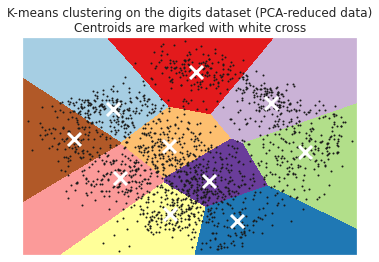

In [35]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()